In [28]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
import pickle
import seg_metrics.seg_metrics as sg
import json
import SimpleITK as sitk
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from os.path import expanduser

#### compare the prediction from nnU-Net with the PET ground truth

#### load the 3D metrics

In [29]:
ANALYSIS_DIR = '/home/daryl/analysis'
ANALYSIS_FILE = '{}/nnunet-metrics-final.pkl'.format(ANALYSIS_DIR)

In [30]:
if os.path.isfile(ANALYSIS_FILE):
    with open(ANALYSIS_FILE, 'rb') as f:
        analysis_d = pickle.load(f)
        print('loaded {} patients from {}'.format(len(analysis_d), ANALYSIS_FILE))

loaded 6 patients from /home/daryl/analysis/nnunet-metrics-final.pkl


In [31]:
print('{: >10}{: >10}{: >10}{: >10}{: >10}{: >10}{: >10}{: >10}{: >10}{: >10}{: >10}'.format('patient ID', 'dataset', 'test ID', '', '', '', 'nnU-Net', '', '', '', 'CTVI-Jac'))
print('{: >10}{: >10}{: >10}{: >10}{: >10}{: >10}{: >10}{: >10}{: >10}{: >10}{: >10}'.format('', '', '', 'high', 'medium', 'low', 'mean', 'high', 'medium', 'low', 'mean'))
print('-'*110)

metadata_d = {'patient_id':[],'dataset_id':[],'test_id':[]}
# DSC
ctvi_jac_DSC_d = {'high':[],'medium':[],'low':[],'mean':[]}
ctvi_hu_DSC_d = {'high':[],'medium':[],'low':[],'mean':[]}
nnunet_DSC_d = {'high':[],'medium':[],'low':[],'mean':[]}
# HD95
ctvi_jac_HD95_d = {'high':[],'medium':[],'low':[],'mean':[]}
ctvi_hu_HD95_d = {'high':[],'medium':[],'low':[],'mean':[]}
nnunet_HD95_d = {'high':[],'medium':[],'low':[],'mean':[]}
# MSD
ctvi_jac_MSD_d = {'high':[],'medium':[],'low':[],'mean':[]}
ctvi_hu_MSD_d = {'high':[],'medium':[],'low':[],'mean':[]}
nnunet_MSD_d = {'high':[],'medium':[],'low':[],'mean':[]}

df_l = []

for key,value in sorted(analysis_d.items()):
    # shorthand variables
    ctvi_jac_d = value['ctvi_jac_d']
    ctvi_hu_d = value['ctvi_hu_d']
    nnunet_d = value['nnunet_d']

    # metadata
    metadata_d['patient_id'].append(key)
    metadata_d['dataset_id'].append(value['dataset_id'])
    metadata_d['test_id'].append(value['test_id'])
    
    # DSC comparison
    ctvi_jac_DSC_d['high'].append(ctvi_jac_d['DSC_high'])
    ctvi_jac_DSC_d['medium'].append(ctvi_jac_d['DSC_medium'])
    ctvi_jac_DSC_d['low'].append(ctvi_jac_d['DSC_low'])
    ctvi_jac_DSC_mean = np.mean([ctvi_jac_d['DSC_high'],ctvi_jac_d['DSC_medium'],ctvi_jac_d['DSC_low']])
    ctvi_jac_DSC_d['mean'].append(ctvi_jac_DSC_mean)
    
    ctvi_hu_DSC_d['high'].append(ctvi_hu_d['DSC_high'])
    ctvi_hu_DSC_d['medium'].append(ctvi_hu_d['DSC_medium'])
    ctvi_hu_DSC_d['low'].append(ctvi_hu_d['DSC_low'])
    ctvi_hu_DSC_mean = np.mean([ctvi_hu_d['DSC_high'],ctvi_hu_d['DSC_medium'],ctvi_hu_d['DSC_low']])
    ctvi_hu_DSC_d['mean'].append(ctvi_hu_DSC_mean)
    
    nnunet_DSC_d['high'].append(nnunet_d['DSC_high'])
    nnunet_DSC_d['medium'].append(nnunet_d['DSC_medium'])
    nnunet_DSC_d['low'].append(nnunet_d['DSC_low'])
    nnunet_DSC_mean = np.mean([nnunet_d['DSC_high'],nnunet_d['DSC_medium'],nnunet_d['DSC_low']])
    nnunet_DSC_d['mean'].append(nnunet_DSC_mean)
    
    # HD95 comparison
    ctvi_jac_HD95_d['high'].append(ctvi_jac_d['HD95_high'])
    ctvi_jac_HD95_d['medium'].append(ctvi_jac_d['HD95_medium'])
    ctvi_jac_HD95_d['low'].append(ctvi_jac_d['HD95_low'])
    ctvi_jac_HD95_mean = np.mean([ctvi_jac_d['HD95_high'],ctvi_jac_d['HD95_medium'],ctvi_jac_d['HD95_low']])
    ctvi_jac_HD95_d['mean'].append(ctvi_jac_HD95_mean)
    
    ctvi_hu_HD95_d['high'].append(ctvi_hu_d['HD95_high'])
    ctvi_hu_HD95_d['medium'].append(ctvi_hu_d['HD95_medium'])
    ctvi_hu_HD95_d['low'].append(ctvi_hu_d['HD95_low'])
    ctvi_hu_HD95_mean = np.mean([ctvi_hu_d['HD95_high'],ctvi_hu_d['HD95_medium'],ctvi_hu_d['HD95_low']])
    ctvi_hu_HD95_d['mean'].append(ctvi_hu_HD95_mean)
    
    nnunet_HD95_d['high'].append(nnunet_d['HD95_high'])
    nnunet_HD95_d['medium'].append(nnunet_d['HD95_medium'])
    nnunet_HD95_d['low'].append(nnunet_d['HD95_low'])
    nnunet_HD95_mean = np.mean([nnunet_d['HD95_high'],nnunet_d['HD95_medium'],nnunet_d['HD95_low']])
    nnunet_HD95_d['mean'].append(nnunet_HD95_mean)

    # MSD comparison
    ctvi_jac_MSD_d['high'].append(ctvi_jac_d['MSD_high'])
    ctvi_jac_MSD_d['medium'].append(ctvi_jac_d['MSD_medium'])
    ctvi_jac_MSD_d['low'].append(ctvi_jac_d['MSD_low'])
    ctvi_jac_MSD_mean = np.mean([ctvi_jac_d['MSD_high'],ctvi_jac_d['MSD_medium'],ctvi_jac_d['MSD_low']])
    ctvi_jac_MSD_d['mean'].append(ctvi_jac_MSD_mean)
    
    ctvi_hu_MSD_d['high'].append(ctvi_hu_d['MSD_high'])
    ctvi_hu_MSD_d['medium'].append(ctvi_hu_d['MSD_medium'])
    ctvi_hu_MSD_d['low'].append(ctvi_hu_d['MSD_low'])
    ctvi_hu_MSD_mean = np.mean([ctvi_hu_d['MSD_high'],ctvi_hu_d['MSD_medium'],ctvi_hu_d['MSD_low']])
    ctvi_hu_MSD_d['mean'].append(ctvi_hu_MSD_mean)
    
    nnunet_MSD_d['high'].append(nnunet_d['MSD_high'])
    nnunet_MSD_d['medium'].append(nnunet_d['MSD_medium'])
    nnunet_MSD_d['low'].append(nnunet_d['MSD_low'])
    nnunet_MSD_mean = np.mean([nnunet_d['MSD_high'],nnunet_d['MSD_medium'],nnunet_d['MSD_low']])
    nnunet_MSD_d['mean'].append(nnunet_MSD_mean)
    
    print('{: >10}{: >10}{: >10}{: >10.2f}{: >10.2f}{: >10.2f}{: >10.2f}{: >10.2f}{: >10.2f}{: >10.2f}{: >10.2f}'.format(key, value['dataset_id'], value['test_id'], 
                                                                                 nnunet_d['DSC_high'], nnunet_d['DSC_medium'], nnunet_d['DSC_low'], nnunet_DSC_mean,
                                                                                 ctvi_jac_d['DSC_high'], ctvi_jac_d['DSC_medium'], ctvi_jac_d['DSC_low'], ctvi_jac_DSC_mean
                                                                                )
         )
print('-'*110)
print('{: >10}{: >10}{: >10}{: >10.2f}{: >10.2f}{: >10.2f}{: >10.2f}{: >10.2f}{: >10.2f}{: >10.2f}{: >10.2f}'.format('means', '', '', 
                                                                             np.mean(nnunet_DSC_d['high']), np.mean(nnunet_DSC_d['medium']), np.mean(nnunet_DSC_d['low']), np.mean(nnunet_DSC_d['mean']),
                                                                             np.mean(ctvi_jac_DSC_d['high']), np.mean(ctvi_jac_DSC_d['medium']), np.mean(ctvi_jac_DSC_d['low']), np.mean(ctvi_jac_DSC_d['mean'])
                                                                            )
     )

patient ID   dataset   test ID                                 nnU-Net                                CTVI-Jac
                                    high    medium       low      mean      high    medium       low      mean
--------------------------------------------------------------------------------------------------------------
         2       161         1      0.55      0.56      0.60      0.57      0.39      0.47      0.56      0.47
         4       160         0      0.70      0.65      0.68      0.68      0.68      0.54      0.65      0.62
         7       162         1      0.72      0.58      0.55      0.62      0.66      0.56      0.71      0.64
         9       160         1      0.72      0.67      0.66      0.68      0.65      0.59      0.62      0.62
        11       161         0      0.75      0.70      0.75      0.73      0.72      0.65      0.73      0.70
        14       162         0      0.81      0.77      0.85      0.81      0.67      0.58      0.74      0.66
-

#### load the 2D metrics

In [32]:
ANALYSIS_2D_DIR = '/home/daryl/analysis/2d'
ANALYSIS_2D_FILE = '{}/nnunet-metrics-final.pkl'.format(ANALYSIS_2D_DIR)

In [33]:
if os.path.isfile(ANALYSIS_2D_FILE):
    with open(ANALYSIS_2D_FILE, 'rb') as f:
        analysis_2d_d = pickle.load(f)
        print('loaded {} patients from {}'.format(len(analysis_2d_d), ANALYSIS_2D_FILE))

loaded 6 patients from /home/daryl/analysis/2d/nnunet-metrics-final.pkl


In [34]:
metadata_2d_d = {'patient_id':[],'dataset_id':[],'test_id':[]}
nnunet_2d_DSC_d = {'high':[],'medium':[],'low':[],'mean':[]}
nnunet_2d_HD95_d = {'high':[],'medium':[],'low':[],'mean':[]}
nnunet_2d_MSD_d = {'high':[],'medium':[],'low':[],'mean':[]}

for key,value in sorted(analysis_2d_d.items()):
    # shorthand variables
    nnunet_2d_d = value['nnunet_d']

    # metadata
    metadata_2d_d['patient_id'].append(key)
    metadata_2d_d['dataset_id'].append(value['dataset_id'])
    metadata_2d_d['test_id'].append(value['test_id'])
    
    # DSC comparison
    nnunet_2d_DSC_d['high'].append(nnunet_2d_d['DSC_high'])
    nnunet_2d_DSC_d['medium'].append(nnunet_2d_d['DSC_medium'])
    nnunet_2d_DSC_d['low'].append(nnunet_2d_d['DSC_low'])
    nnunet_2d_DSC_mean = np.mean([nnunet_2d_d['DSC_high'],nnunet_2d_d['DSC_medium'],nnunet_2d_d['DSC_low']])
    nnunet_2d_DSC_d['mean'].append(nnunet_2d_DSC_mean)

    # HD95 comparison
    nnunet_2d_HD95_d['high'].append(nnunet_2d_d['HD95_high'])
    nnunet_2d_HD95_d['medium'].append(nnunet_2d_d['HD95_medium'])
    nnunet_2d_HD95_d['low'].append(nnunet_2d_d['HD95_low'])
    nnunet_2d_HD95_mean = np.mean([nnunet_2d_d['HD95_high'],nnunet_2d_d['HD95_medium'],nnunet_2d_d['HD95_low']])
    nnunet_2d_HD95_d['mean'].append(nnunet_2d_HD95_mean)

    # MSD comparison
    nnunet_2d_MSD_d['high'].append(nnunet_2d_d['MSD_high'])
    nnunet_2d_MSD_d['medium'].append(nnunet_2d_d['MSD_medium'])
    nnunet_2d_MSD_d['low'].append(nnunet_2d_d['MSD_low'])
    nnunet_2d_MSD_mean = np.mean([nnunet_2d_d['MSD_high'],nnunet_2d_d['MSD_medium'],nnunet_2d_d['MSD_low']])
    nnunet_2d_MSD_d['mean'].append(nnunet_2d_MSD_mean)

#### box plot for DSC

In [35]:
boxplot_nnunet = []
boxplot_nnunet.append(nnunet_DSC_d['high'])
boxplot_nnunet.append(nnunet_DSC_d['medium'])
boxplot_nnunet.append(nnunet_DSC_d['low'])

boxplot_nnunet_2d = []
boxplot_nnunet_2d.append(nnunet_2d_DSC_d['high'])
boxplot_nnunet_2d.append(nnunet_2d_DSC_d['medium'])
boxplot_nnunet_2d.append(nnunet_2d_DSC_d['low'])

boxplot_jac = []
boxplot_jac.append(ctvi_jac_DSC_d['high'])
boxplot_jac.append(ctvi_jac_DSC_d['medium'])
boxplot_jac.append(ctvi_jac_DSC_d['low'])

boxplot_hu = []
boxplot_hu.append(ctvi_hu_DSC_d['high'])
boxplot_hu.append(ctvi_hu_DSC_d['medium'])
boxplot_hu.append(ctvi_hu_DSC_d['low'])

In [36]:
print('high-function DSC mean (range)')
print('{: <15}{:0.2f} ({:0.2f} to {:0.2f})'.format('nnU-Net', np.mean(boxplot_nnunet[0]), np.min(boxplot_nnunet[0]), np.max(boxplot_nnunet[0])))
print('{: <15}{:0.2f} ({:0.2f} to {:0.2f})'.format('nnU-Net-2D', np.mean(boxplot_nnunet_2d[0]), np.min(boxplot_nnunet_2d[0]), np.max(boxplot_nnunet_2d[0])))
print('{: <15}{:0.2f} ({:0.2f} to {:0.2f})'.format('Jac', np.mean(boxplot_jac[0]), np.min(boxplot_jac[0]), np.max(boxplot_jac[0])))
print('{: <15}{:0.2f} ({:0.2f} to {:0.2f})'.format('HU', np.mean(boxplot_hu[0]), np.min(boxplot_hu[0]), np.max(boxplot_hu[0])))

high-function DSC mean (range)
nnU-Net        0.71 (0.55 to 0.81)
nnU-Net-2D     0.68 (0.59 to 0.76)
Jac            0.63 (0.39 to 0.72)
HU             0.60 (0.42 to 0.69)


In [37]:
import pandas as pd
rows_l = []

# 3D analysis
for patient_id in analysis_d.keys():
    patient_d = analysis_d[patient_id]
    for model in ['nnunet','ctvi_jac','ctvi_hu']:
        for metric in ['DSC','HD95','MSD']:
            for subregion in ['high','medium','low']:
                d = {'patient_id':patient_id, 'dataset_id':patient_d['dataset_id'], 'test_id':patient_d['test_id']}
                d['model'] = model
                d['metric'] = metric
                d['subregion'] = subregion
                d['value'] = patient_d[model+'_d'][metric+'_'+subregion]
                rows_l.append(d)

# add 2D analysis
for patient_id in analysis_2d_d.keys():
    patient_d = analysis_2d_d[patient_id]
    for metric in ['DSC','HD95','MSD']:
        for subregion in ['high','medium','low']:
            d = {'patient_id':patient_id, 'dataset_id':patient_d['dataset_id'], 'test_id':patient_d['test_id']}
            d['model'] = 'nnunet-2D'
            d['metric'] = metric
            d['subregion'] = subregion
            d['value'] = patient_d['nnunet_d'][metric+'_'+subregion]
            rows_l.append(d)

analysis_df = pd.DataFrame(rows_l)

In [38]:
custom_dict = {'nnunet': 0, 'nnunet-2D': 1, 'ctvi_jac': 2, 'ctvi_hu': 3, 'high':4, 'medium':5, 'low':6}
analysis_df.sort_values(by=['model','subregion'], key=lambda x: x.map(custom_dict), inplace=True)

In [39]:
def box_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    mask = (series < (Q1 - (1.5 * IQR))) | (series > (Q3 + (1.5 * IQR)))
    series = series[mask]
    return series

In [40]:
label_offsets = {'nnunet':-0.26, 'nnunet-2D':-0.06, 'ctvi_jac':0.14, 'ctvi_hu':0.34}
plot_x = {'high':0, 'medium':1, 'low':2}

In [41]:
dsc_analysis_df = analysis_df[analysis_df['metric']=='DSC']

In [42]:
params = {}
params['font.size'] = 10
params['figure.dpi'] = 150
params['figure.figsize'] = 9,7

plt.rcParams.update(params)

nnunet, high, P2, (-0.26, 0.55)
nnunet, high, P14, (-0.26, 0.81)
nnunet, medium: None
nnunet, low: None
nnunet-2D, high: None
nnunet-2D, medium, P14, (0.94, 0.73)
nnunet-2D, low: None
ctvi_jac, high, P11, (0.14, 0.72)
ctvi_jac, high, P2, (0.14, 0.39)
ctvi_jac, medium, P2, (1.1400000000000001, 0.47)
ctvi_jac, low: None
ctvi_hu, high: None
ctvi_hu, medium: None
ctvi_hu, low: None

saved figure to /home/daryl/figures/ctvi-nnunet-jac-hu-DSC-boxplot.svg


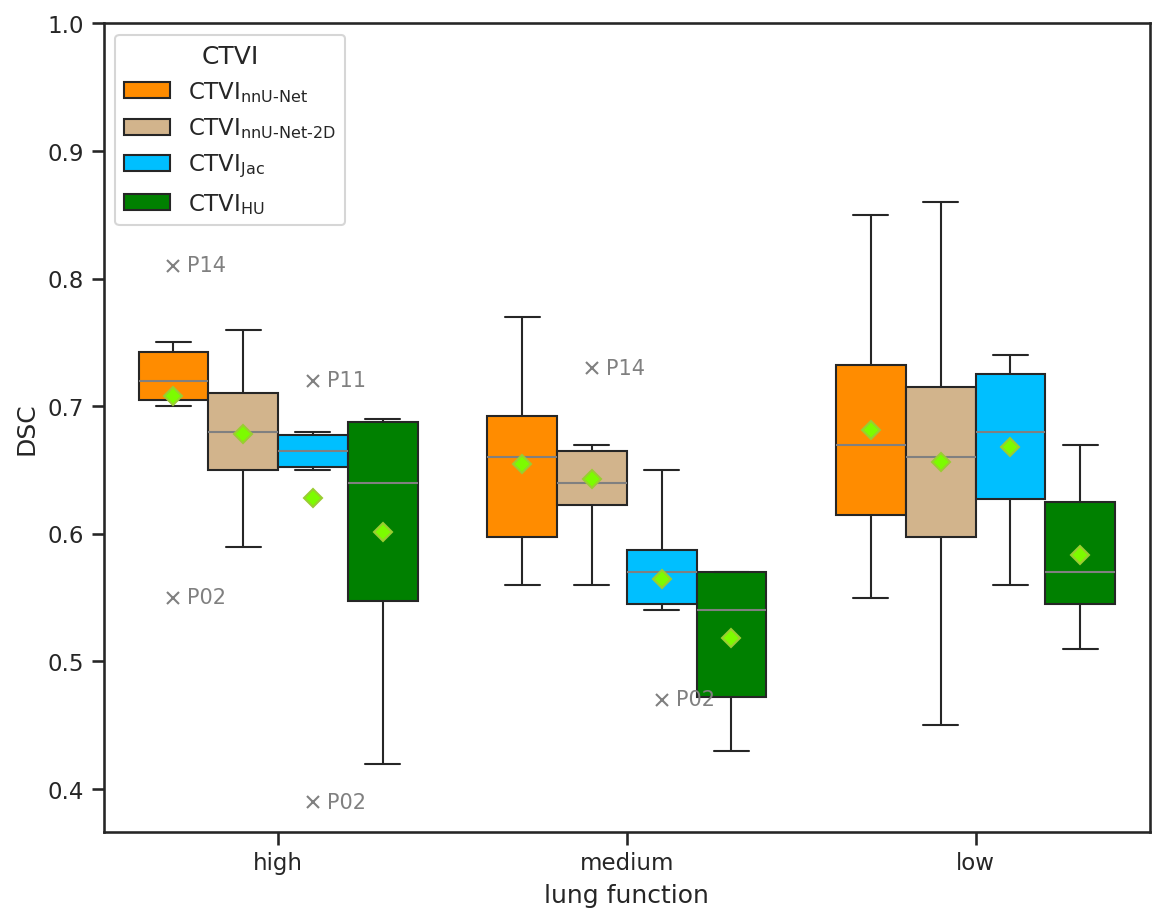

In [43]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

bp = sns.boxplot(x="subregion", y="value",
                 hue="model", palette=['darkorange','tan','deepskyblue','green'], 
                 flierprops=dict(markerfacecolor='lightgrey', marker='x', markeredgecolor='grey'),
                 medianprops={"color": "gray", "linewidth": 1}, 
                 meanprops=dict(markerfacecolor='lawngreen', marker='D', markeredgecolor='yellowgreen'),
                 saturation=1.0, 
                 showmeans=True,
                 legend=True,
                 data=dsc_analysis_df)

# label the outliers
for model in label_offsets.keys():
    for subregion_idx,subregion in enumerate(['high','medium','low']):
        df = dsc_analysis_df[(dsc_analysis_df['model'] == model) & (dsc_analysis_df['subregion'] == subregion)]
        outliers = list(box_outliers(df.value))
        if len(outliers) > 0:
            for o in outliers:
                patient_id = df.iloc[(df['value'] - o).abs().argsort()[:1]].patient_id.iloc[0]
                text_x = plot_x[subregion]+label_offsets[model]
                text_y = o
                plt.text(text_x, text_y, 'P{:02d}'.format(patient_id), ha='left', va='center', fontsize=10, color='grey')
                print('{}, {}, P{}, ({}, {})'.format(model, subregion, patient_id, text_x, text_y))
        else:
            print('{}, {}: None'.format(model, subregion))
print()

# modify the legend
legend = bp.get_legend()
legend.set_title('CTVI')
new_labels = [r'CTVI$_\text{nnU-Net}$', r'CTVI$_\text{nnU-Net-2D}$', r'CTVI$_\text{Jac}$', r'CTVI$_\text{HU}$']
for t, l in zip(legend.texts, new_labels):
    t.set_text(l)
# legend.set_loc('lower right')
legend.set_loc('best')

_ = bp.set_xlabel('lung function')
_ = bp.set_ylabel('DSC')

_ = bp.set_ylim([None,1.0])

fig_filename = '{}/figures/ctvi-nnunet-jac-hu-DSC-boxplot.svg'.format(expanduser('~'))
plt.savefig(fig_filename, format='svg', dpi=600, bbox_inches='tight')
print('saved figure to {}'.format(fig_filename))

#### box plot for HD95

In [44]:
boxplot_nnunet = []
boxplot_nnunet.append(nnunet_HD95_d['high'])
boxplot_nnunet.append(nnunet_HD95_d['medium'])
boxplot_nnunet.append(nnunet_HD95_d['low'])

boxplot_nnunet_2d = []
boxplot_nnunet_2d.append(nnunet_2d_HD95_d['high'])
boxplot_nnunet_2d.append(nnunet_2d_HD95_d['medium'])
boxplot_nnunet_2d.append(nnunet_2d_HD95_d['low'])

boxplot_jac = []
boxplot_jac.append(ctvi_jac_HD95_d['high'])
boxplot_jac.append(ctvi_jac_HD95_d['medium'])
boxplot_jac.append(ctvi_jac_HD95_d['low'])

boxplot_hu = []
boxplot_hu.append(ctvi_hu_HD95_d['high'])
boxplot_hu.append(ctvi_hu_HD95_d['medium'])
boxplot_hu.append(ctvi_hu_HD95_d['low'])

In [45]:
print('{:0.0f}'.format(32.234567))

32


In [46]:
print('high-function HD95 mean (range)')
print('{: <15}{:0.1f} ({:0.1f} to {:0.1f})'.format('nnU-Net', np.mean(boxplot_nnunet[0]), np.min(boxplot_nnunet[0]), np.max(boxplot_nnunet[0])))
print('{: <15}{:0.1f} ({:0.1f} to {:0.1f})'.format('nnU-Net-2D', np.mean(boxplot_nnunet_2d[0]), np.min(boxplot_nnunet_2d[0]), np.max(boxplot_nnunet_2d[0])))
print('{: <15}{:0.1f} ({:0.1f} to {:0.1f})'.format('Jac', np.mean(boxplot_jac[0]), np.min(boxplot_jac[0]), np.max(boxplot_jac[0])))
print('{: <15}{:0.1f} ({:0.1f} to {:0.1f})'.format('HU', np.mean(boxplot_hu[0]), np.min(boxplot_hu[0]), np.max(boxplot_hu[0])))

high-function HD95 mean (range)
nnU-Net        32.6 (15.1 to 47.5)
nnU-Net-2D     31.7 (16.4 to 74.7)
Jac            33.4 (22.7 to 62.8)
HU             32.0 (24.0 to 51.9)


In [47]:
hd95_analysis_df = analysis_df[analysis_df['metric']=='HD95']

In [48]:
params = {}
params['font.size'] = 10
params['figure.dpi'] = 150
params['figure.figsize'] = 9,7

plt.rcParams.update(params)

nnunet, high, P14, (-0.26, 15.07)
nnunet, medium, P7, (0.74, 37.13)
nnunet, low, P14, (1.74, 6.08)
nnunet, low, P7, (1.74, 21.61)
nnunet-2D, high, P7, (-0.06, 74.73)
nnunet-2D, medium, P7, (0.94, 54.07)
nnunet-2D, low, P14, (1.94, 5.83)
nnunet-2D, low, P7, (1.94, 19.1)
ctvi_jac, high, P2, (0.14, 62.83)
ctvi_jac, medium: None
ctvi_jac, low, P7, (2.14, 21.26)
ctvi_hu, high, P7, (0.34, 51.92)
ctvi_hu, medium, P7, (1.34, 57.08)
ctvi_hu, low, P7, (2.34, 25.81)

saved figure to /home/daryl/figures/ctvi-nnunet-jac-hu-HD95-boxplot.svg


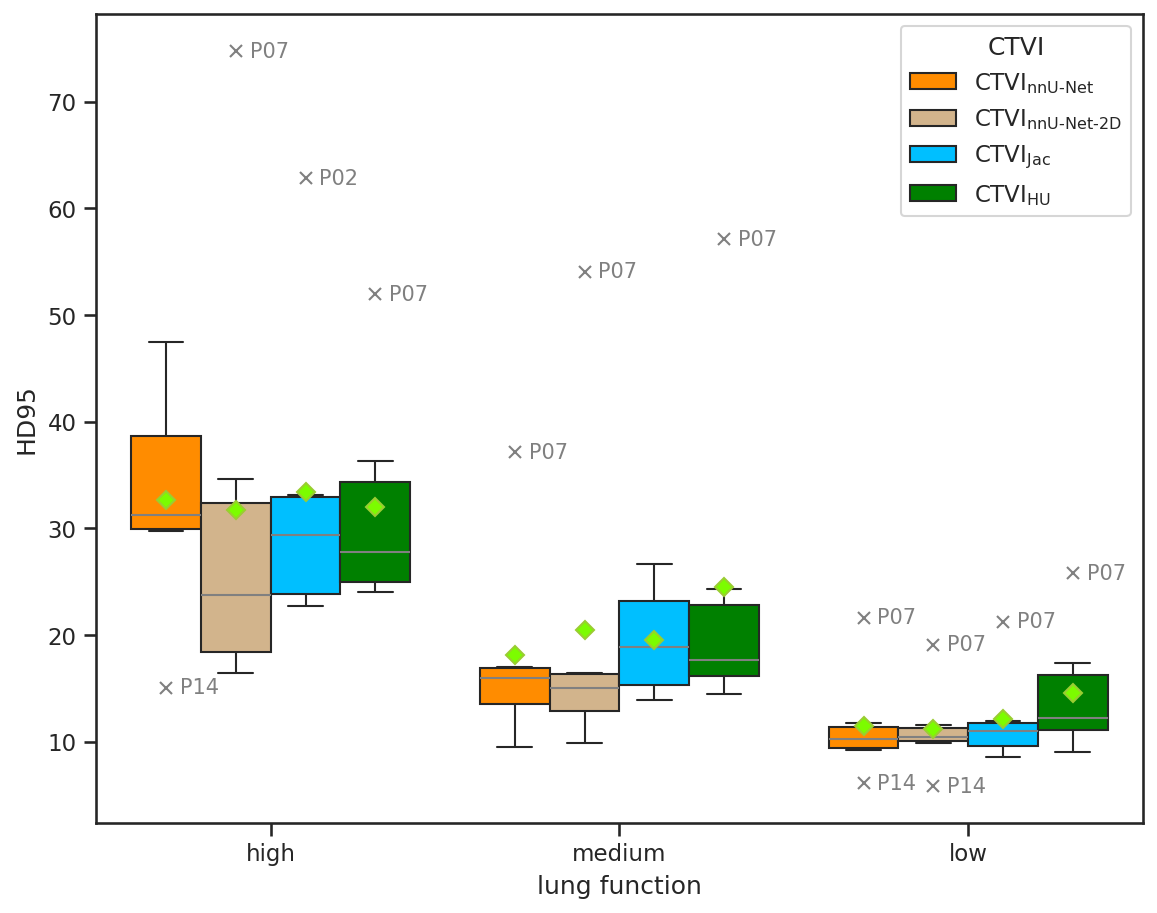

In [49]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

bp = sns.boxplot(x="subregion", y="value",
                 hue="model", palette=['darkorange','tan','deepskyblue','green'], 
                 flierprops=dict(markerfacecolor='lightgrey', marker='x', markeredgecolor='grey'),
                 medianprops={"color": "gray", "linewidth": 1}, 
                 meanprops=dict(markerfacecolor='lawngreen', marker='D', markeredgecolor='yellowgreen'),
                 saturation=1.0, 
                 showmeans=True,
                 legend=True,
                 data=hd95_analysis_df)

# label the outliers
for model in label_offsets.keys():
    for subregion_idx,subregion in enumerate(['high','medium','low']):
        df = hd95_analysis_df[(hd95_analysis_df['model'] == model) & (hd95_analysis_df['subregion'] == subregion)]
        outliers = list(box_outliers(df.value))
        if len(outliers) > 0:
            for o in outliers:
                patient_id = df.iloc[(df['value'] - o).abs().argsort()[:1]].patient_id.iloc[0]
                text_x = plot_x[subregion]+label_offsets[model]
                text_y = o
                plt.text(text_x, text_y, 'P{:02d}'.format(patient_id), ha='left', va='center', fontsize=10, color='grey')
                print('{}, {}, P{}, ({}, {})'.format(model, subregion, patient_id, text_x, text_y))
        else:
            print('{}, {}: None'.format(model, subregion))
print()

# modify the legend
legend = bp.get_legend()
legend.set_title('CTVI')
new_labels = [r'CTVI$_\text{nnU-Net}$', r'CTVI$_\text{nnU-Net-2D}$', r'CTVI$_\text{Jac}$', r'CTVI$_\text{HU}$']
for t, l in zip(legend.texts, new_labels):
    t.set_text(l)
# legend.set_loc('lower right')
legend.set_loc('best')

_ = bp.set_xlabel('lung function')
_ = bp.set_ylabel('HD95')

# _ = bp.set_ylim([0.0,1.0])

fig_filename = '{}/figures/ctvi-nnunet-jac-hu-HD95-boxplot.svg'.format(expanduser('~'))
plt.savefig(fig_filename, format='svg', dpi=600, bbox_inches='tight')
print('saved figure to {}'.format(fig_filename))

#### box plot for MSD

In [50]:
boxplot_nnunet = []
boxplot_nnunet.append(nnunet_MSD_d['high'])
boxplot_nnunet.append(nnunet_MSD_d['medium'])
boxplot_nnunet.append(nnunet_MSD_d['low'])

boxplot_nnunet_2d = []
boxplot_nnunet_2d.append(nnunet_2d_MSD_d['high'])
boxplot_nnunet_2d.append(nnunet_2d_MSD_d['medium'])
boxplot_nnunet_2d.append(nnunet_2d_MSD_d['low'])

boxplot_jac = []
boxplot_jac.append(ctvi_jac_MSD_d['high'])
boxplot_jac.append(ctvi_jac_MSD_d['medium'])
boxplot_jac.append(ctvi_jac_MSD_d['low'])

boxplot_hu = []
boxplot_hu.append(ctvi_hu_MSD_d['high'])
boxplot_hu.append(ctvi_hu_MSD_d['medium'])
boxplot_hu.append(ctvi_hu_MSD_d['low'])

In [51]:
print('high-function MSD mean (range)')
print('{: <15}{:0.2f} ({:0.2f} to {:0.2f})'.format('nnU-Net', np.mean(boxplot_nnunet[0]), np.min(boxplot_nnunet[0]), np.max(boxplot_nnunet[0])))
print('{: <15}{:0.2f} ({:0.2f} to {:0.2f})'.format('nnU-Net-2D', np.mean(boxplot_nnunet_2d[0]), np.min(boxplot_nnunet_2d[0]), np.max(boxplot_nnunet_2d[0])))
print('{: <15}{:0.2f} ({:0.2f} to {:0.2f})'.format('Jac', np.mean(boxplot_jac[0]), np.min(boxplot_jac[0]), np.max(boxplot_jac[0])))
print('{: <15}{:0.2f} ({:0.2f} to {:0.2f})'.format('HU', np.mean(boxplot_hu[0]), np.min(boxplot_hu[0]), np.max(boxplot_hu[0])))

high-function MSD mean (range)
nnU-Net        8.62 (4.66 to 10.98)
nnU-Net-2D     8.02 (5.05 to 15.07)
Jac            9.99 (7.99 to 17.08)
HU             8.72 (7.14 to 13.26)


In [52]:
msd_analysis_df = analysis_df[analysis_df['metric']=='MSD']

In [53]:
params = {}
params['font.size'] = 10
params['figure.dpi'] = 150
params['figure.figsize'] = 9,7

plt.rcParams.update(params)

nnunet, high: None
nnunet, medium, P14, (0.74, 2.83)
nnunet, medium, P7, (0.74, 7.94)
nnunet, low, P14, (1.74, 1.15)
nnunet, low, P7, (1.74, 4.14)
nnunet-2D, high, P7, (-0.06, 15.07)
nnunet-2D, medium, P7, (0.94, 9.71)
nnunet-2D, low, P14, (1.94, 1.07)
nnunet-2D, low, P7, (1.94, 3.73)
ctvi_jac, high, P2, (0.14, 17.08)
ctvi_jac, medium: None
ctvi_jac, low, P7, (2.14, 4.01)
ctvi_hu, high, P7, (0.34, 13.26)
ctvi_hu, medium, P7, (1.34, 11.91)
ctvi_hu, low, P7, (2.34, 6.62)

saved figure to /home/daryl/figures/ctvi-nnunet-jac-hu-MSD-boxplot.svg


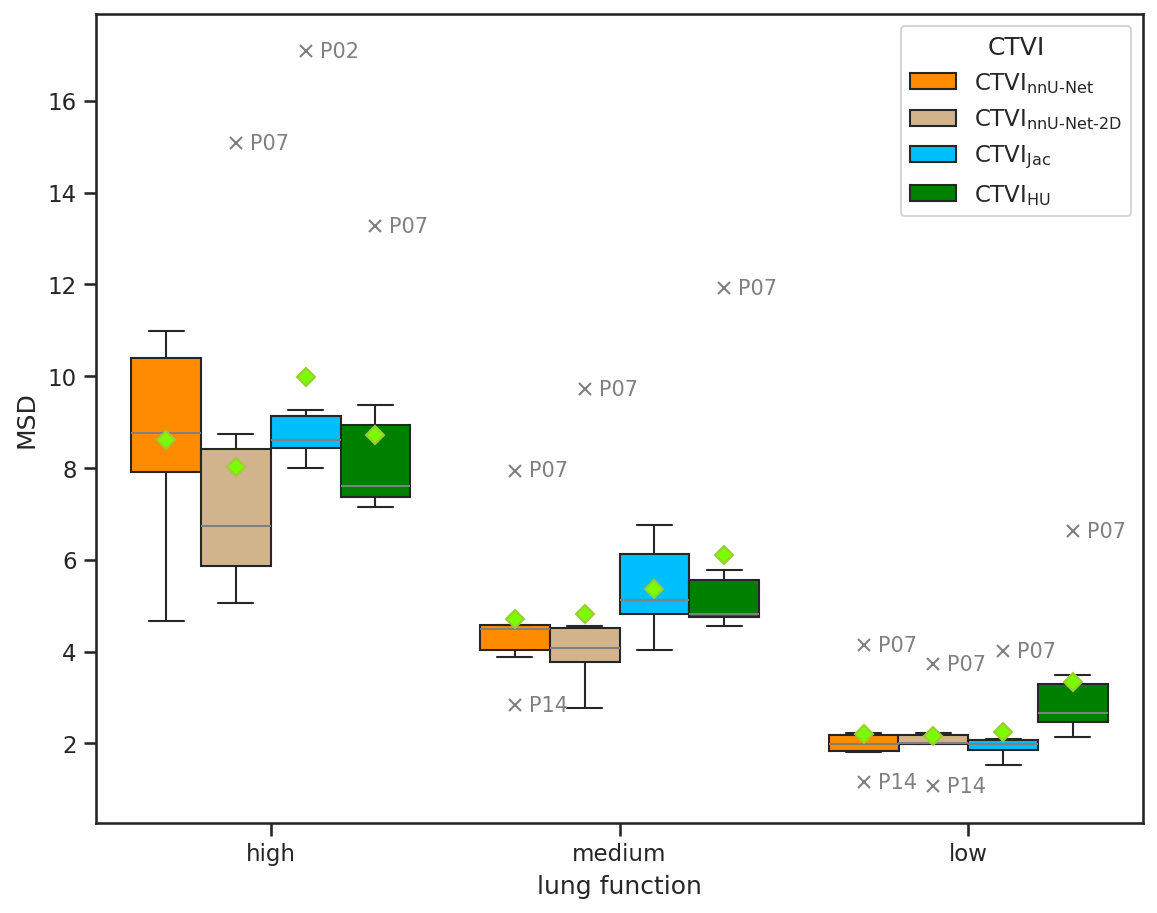

In [54]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

bp = sns.boxplot(x="subregion", y="value",
                 hue="model", palette=['darkorange','tan','deepskyblue','green'], 
                 flierprops=dict(markerfacecolor='lightgrey', marker='x', markeredgecolor='grey'),
                 medianprops={"color": "gray", "linewidth": 1}, 
                 meanprops=dict(markerfacecolor='lawngreen', marker='D', markeredgecolor='yellowgreen'),
                 saturation=1.0, 
                 showmeans=True,
                 legend=True,
                 data=msd_analysis_df)

# label the outliers
for model in label_offsets.keys():
    for subregion_idx,subregion in enumerate(['high','medium','low']):
        df = msd_analysis_df[(msd_analysis_df['model'] == model) & (msd_analysis_df['subregion'] == subregion)]
        outliers = list(box_outliers(df.value))
        if len(outliers) > 0:
            for o in outliers:
                patient_id = df.iloc[(df['value'] - o).abs().argsort()[:1]].patient_id.iloc[0]
                text_x = plot_x[subregion]+label_offsets[model]
                text_y = o
                plt.text(text_x, text_y, 'P{:02d}'.format(patient_id), ha='left', va='center', fontsize=10, color='grey')
                print('{}, {}, P{}, ({}, {})'.format(model, subregion, patient_id, text_x, text_y))
        else:
            print('{}, {}: None'.format(model, subregion))
print()

# modify the legend
legend = bp.get_legend()
legend.set_title('CTVI')
new_labels = [r'CTVI$_\text{nnU-Net}$', r'CTVI$_\text{nnU-Net-2D}$', r'CTVI$_\text{Jac}$', r'CTVI$_\text{HU}$']
for t, l in zip(legend.texts, new_labels):
    t.set_text(l)
# legend.set_loc('lower right')
legend.set_loc('best')

_ = bp.set_xlabel('lung function')
_ = bp.set_ylabel('MSD')

# _ = bp.set_ylim([0.0,1.0])

fig_filename = '{}/figures/ctvi-nnunet-jac-hu-MSD-boxplot.svg'.format(expanduser('~'))
plt.savefig(fig_filename, format='svg', dpi=600, bbox_inches='tight')
print('saved figure to {}'.format(fig_filename))